In [847]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [848]:
import warnings
warnings.filterwarnings('ignore')

In [849]:
data=pd.read_csv('data/bengaluru_house_prices.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [850]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [851]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [852]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [853]:
data.duplicated().sum()

529

In [854]:
data = data.drop_duplicates()

In [855]:
data.duplicated().sum()

0

In [856]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [857]:
# Handling missing values
data['location'].fillna(data['location'].mode()[0], inplace=True)  # Fill location with mode
data['size'].fillna(data['size'].mode()[0], inplace=True)  # Fill size with mode
data['society'].fillna(data['society'].mode()[0], inplace=True)  # Fill society with mode
data['bath'].fillna(data['bath'].median(), inplace=True)  # Fill bath with median
data['balcony'].fillna(data['balcony'].median(), inplace=True)  # Fill balcony with median

In [858]:
data.isna().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

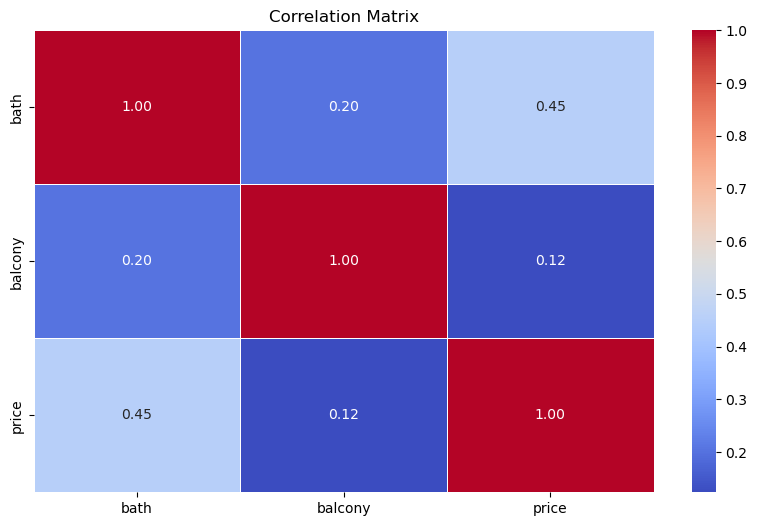

In [859]:
# Correlation matrix
numerical_data = data.select_dtypes(include=[np.number])
corr = numerical_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [875]:
# Label Encoding for categorical variables
label_encoder = LabelEncoder()

data['area_type'] = label_encoder.fit_transform(data['area_type'])
data['availability'] = label_encoder.fit_transform(data['availability'])
data['location'] = label_encoder.fit_transform(data['location'])
data['size'] = label_encoder.fit_transform(data['size'])
data['society'] = label_encoder.fit_transform(data['society'])
data['total_sqft'] = label_encoder.fit_transform(data['total_sqft'])


In [867]:
data.dtypes

area_type         int32
availability      int32
location          int32
size              int32
society           int32
total_sqft        int32
bath            float64
balcony         float64
price           float64
dtype: object

In [879]:
X = data.drop(columns=['price'])  
Y = data['price'] 

In [880]:
# Check data types of columns in X
print(X.dtypes)


area_type         int64
availability      int64
location          int64
size              int64
society           int64
total_sqft        int64
bath            float64
balcony         float64
dtype: object


In [881]:
sd=StandardScaler()
X_fit=sd.fit_transform(X)
X_fit

array([[ 0.6331634 , -1.67756474, -0.69449877, ..., -1.1097643 ,
        -0.520014  , -0.7454089 ],
       [-0.23236968,  0.48053647, -0.97390798, ...,  0.81741501,
         1.69420008,  1.73076957],
       [-1.96343584,  0.48053647,  1.38737378, ..., -0.40724574,
        -0.520014  ,  1.73076957],
       ...,
       [ 0.6331634 ,  0.48053647,  0.90799523, ...,  1.20823051,
         1.69420008,  0.49268034],
       [-1.96343584,  0.48053647,  0.82033744, ..., -0.9483749 ,
        -0.520014  , -0.7454089 ],
       [ 0.6331634 , -2.10918499,  0.64228255, ...,  1.43765662,
         0.95612872, -0.7454089 ]])

In [901]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_fit,Y,test_size=0.30,random_state=2)

In [902]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [903]:
y_pred=lr.predict(x_test)
y_pred

array([101.24376862, 201.39248299, 257.09228481, ..., 132.94594967,
        66.00042456, 176.91850062])

In [904]:
print("Coefficient:",lr.coef_) #m
print("Intercept:",lr.intercept_) #C
# Y=mX+C

Coefficient: [ 1.13235103 -2.10659829  1.50380862 17.59288095 -1.81128809 26.76496106
 47.28616393  7.05505289]
Intercept: 113.26968863022016


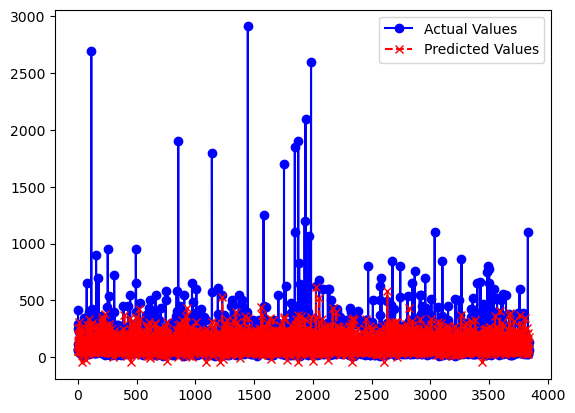

In [905]:
# Plotting actual values (y_test) with a line (blue)
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Values', linestyle='-', marker='o')

# Plotting predicted values (y_pred) with a line (red)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Values', linestyle='--', marker='x')
plt.legend()

In [906]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

55.50766733129212
17377.540366937883
131.82389907349076


In [907]:
Results=pd.DataFrame(columns=['Actual_price','Predicted_price'])
Results['Actual_price']=y_test
Results['Predicted_price']=y_pred
Results=Results.reset_index()
Results.head()

,index,Actual_price,Predicted_price
0,12028,62.0,101.243769
1,2272,250.0,201.392483
2,7127,416.0,257.092285
3,6740,62.0,50.196814
4,4059,70.0,54.608160


In [908]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.2543981007786782

In [917]:
#END